https://nwis.waterservices.usgs.gov/

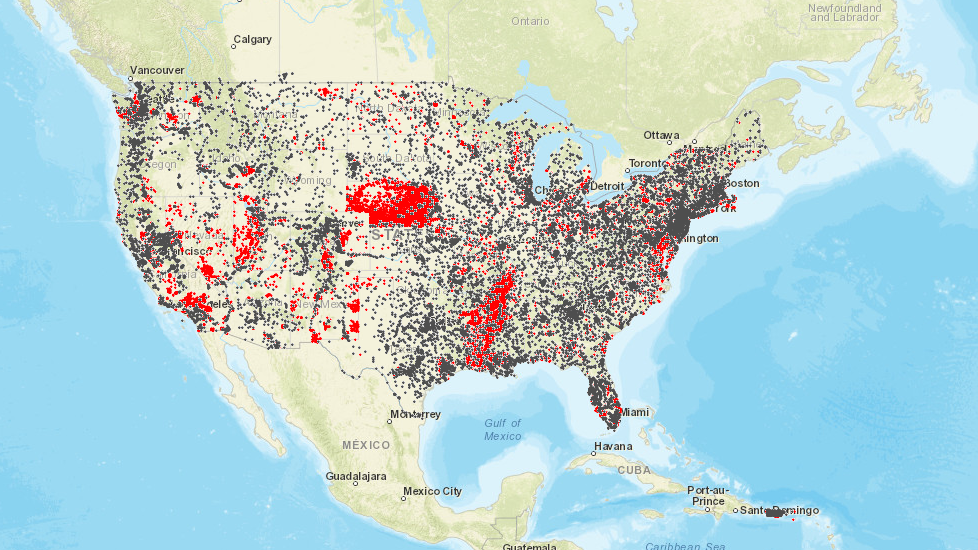

In [182]:
import requests
import pandas as pd

site_code = '01646500' # replace this with the site code for your location
start_date = '2022-01-20' # replace this with your desired start date
end_date = '2022-02-20' # replace this with your desired end date

url = f'https://waterservices.usgs.gov/nwis/iv/?format=json&sites={site_code}&startDT={start_date}&endDT={end_date}&parameterCd=00010' # 00010 is the code for water temperature

response = requests.get(url)
print(response)

data = response.json()['value']['timeSeries'][0]['values'][4]['value']

df = pd.DataFrame(data)
df['dateTime'] = pd.to_datetime(df['dateTime'])
df.set_index('dateTime', inplace=True)
df.rename(columns={'value': 'water_temp'}, inplace=True)

print(df.head())
df.describe()

<Response [200]>
                          water_temp qualifiers
dateTime                                       
2022-01-20 00:00:00-05:00        1.2        [A]
2022-01-20 00:15:00-05:00        1.2        [A]
2022-01-20 00:30:00-05:00        1.2        [A]
2022-01-20 00:45:00-05:00        1.2        [A]
2022-01-20 01:00:00-05:00        1.2        [A]


,water_temp,qualifiers
count,3072,3072
unique,83,1
top,0.2,[A]
freq,133,3072


In [181]:
np.arange(1,100,15)

array([ 1, 16, 31, 46, 61, 76, 91])

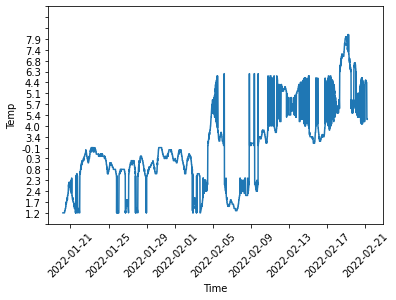

In [211]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(df['water_temp'])
plt.yticks(np.arange(-5, 100, 5))
plt.xticks(rotation=45)
plt.xlabel("Time", )
plt.ylabel('Temp',)
plt.show()


In [ ]:
print(response.json().keys())
print(response.json()['value'].keys())
print(response.json()['value']['timeSeries'][0].keys())
print(response.json()['value']['timeSeries'][0]['values'][0].keys())
print(response.json()['value']['timeSeries'][0]['values'][4].keys())
print(response.json()['value']['timeSeries'][0]['values'][4]['value'][0].keys())
response.json()['value']['timeSeries'][0]['values'][4]['value'][0]['value']



### Using Usgs API

In [ ]:
# pip install usgs

In [130]:
# import usgs
# import pandas as pd

# # Define the USGS site code for the location of interest
# site_code = "01594440"

# # Define the start and end dates of the time range of interest
# start_date = "2020-01-01"
# end_date = "2021-12-31"

# # Specify the data parameter code for water temperature
# parameter_code = "00010"

# # Use the USGS package to retrieve the data
# data = usgs.get_data(
#     sites=site_code,
#     start=start_date,
#     end=end_date,
#     parameterCd=parameter_code
# )

# # Convert the data to a pandas DataFrame
# df = pd.DataFrame(data["values"], columns=["datetime", "temperature"])
# df["datetime"] = pd.to_datetime(df["datetime"])
# df.set_index("datetime", inplace=True)

# # Print the first few rows of the DataFrame
# print(df.head())


In [ ]:
# importing data from kwater data 

import requests

# Set the API endpoint URL
url = 'https://openapi.kwater.or.kr/openapi-data/service/pubd/dam/wtlfl?'

# Set the API parameters, including the API key and site code
params = {
    'serviceKey': 'YOUR_API_KEY_HERE',
    'siteId': '1005220',
    'startDate': '20220201',
    'endDate': '20220228',
    'numOfRows': '1000'
}

# Make the API request and get the response data
response = requests.get(url, params=params)
print(response.status_code)
data = response.json()['response']['body']['items']['item']

# Convert the data to a pandas dataframe
import pandas as pd
df = pd.DataFrame(data)

# Print the first 5 rows of the data
print(df.head())

